In [260]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [261]:
from sklearn import tree
import matplotlib.pyplot as plt
%matplotlib inline

In [262]:
titanic_train_data_path = '../input/titanic/train.csv'
train = pd.read_csv(titanic_train_data_path)
train = train.fillna(0)
train.Embarked = train.Embarked.replace({"C":0, "S":1,"Q":2})
train.Sex = train.Sex.replace({'female':0,'male':1})
print(train.Embarked)
train.columns

0      1
1      0
2      1
3      1
4      1
      ..
886    1
887    1
888    1
889    0
890    2
Name: Embarked, Length: 891, dtype: int64


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [263]:
features = ["Pclass", "Age", "Embarked", 'Sex']
X = train[features]
y = train.Survived


In [264]:
from sklearn.tree import DecisionTreeRegressor

In [265]:
survival_model = DecisionTreeRegressor(random_state=1)
survival_model.fit(X,y)

DecisionTreeRegressor(random_state=1)

In [266]:
test_path = '../input/titanic/test.csv'
test = pd.read_csv(test_path)
test = test.fillna(0)
test.Embarked = test.Embarked.replace({"C":0, "S":1,"Q":2})
test.Sex = test.Sex.replace({'female':0,'male':1})
test_X = test[features]
test_pred = survival_model.predict(test_X)
pred = survival_model.predict(X)

,Pclass,Age,Embarked,Sex
208,1,33.0,0,0
350,1,45.0,0,0
122,1,35.0,0,0
343,1,58.0,0,0
131,1,53.0,0,1
...,...,...,...,...
165,3,26.0,1,0
163,3,0.0,1,1
161,3,7.0,0,1
199,3,0.0,1,0


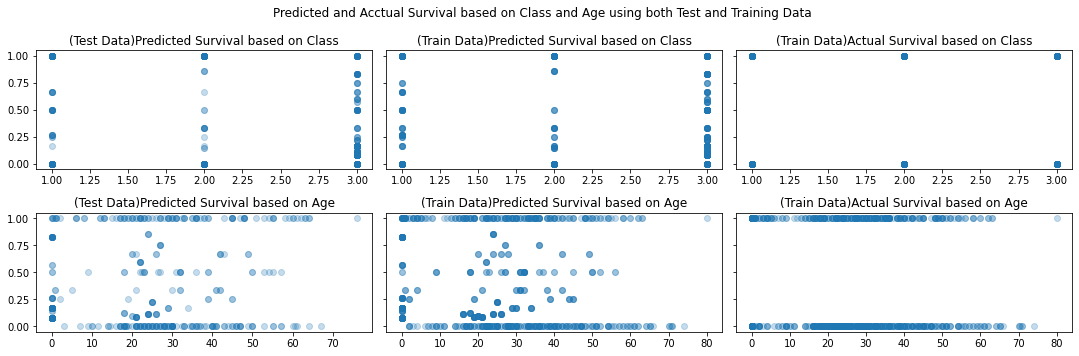

In [267]:
fig, axs = plt.subplots(2, 3, figsize=(15, 5), sharey=True)
fig.suptitle("Predicted and Acctual Survival based on Class and Age using both Test and Training Data")
axs[0][0].scatter(test_X["Pclass"],test_pred, alpha=.25)
axs[0][0].set_title("(Test Data)Predicted Survival based on Class")
axs[0][1].scatter(X["Pclass"], pred, alpha=.25)
axs[0][1].set_title("(Train Data)Predicted Survival based on Class")
axs[0][2].scatter(X["Pclass"], y, alpha=.25)
axs[0][2].set_title("(Train Data)Actual Survival based on Class")
axs[1][0].scatter(test_X["Age"], test_pred, alpha=.25)
axs[1][0].set_title("(Test Data)Predicted Survival based on Age")
axs[1][1].scatter(X["Age"], pred, alpha=.25)
axs[1][1].set_title("(Train Data)Predicted Survival based on Age")
axs[1][2].scatter(X["Age"], y, alpha=.25)
axs[1][2].set_title("(Train Data)Actual Survival based on Age")
fig.tight_layout()

In [268]:
from sklearn.metrics import mean_absolute_error
val_mae = mean_absolute_error(y,pred)
print(val_mae)
test_pred = test_pred.astype('int')


0.13572504353709414


In [269]:
output = pd.DataFrame({
    "PassengerId": test.PassengerId,
    "Survived": test_pred
})
output.to_csv('submission.csv', index=False)